In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords', 'punkt'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#load the dataset
Hoteldf = pd.read_csv('Hotel.csv', encoding='latin1')  # or try 'ISO-8859-1' or 'cp1252'
Hoteldf.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


In [3]:
Hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   20491 non-null  int64 
 1   Review  20491 non-null  object
 2   Rating  20491 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 480.4+ KB


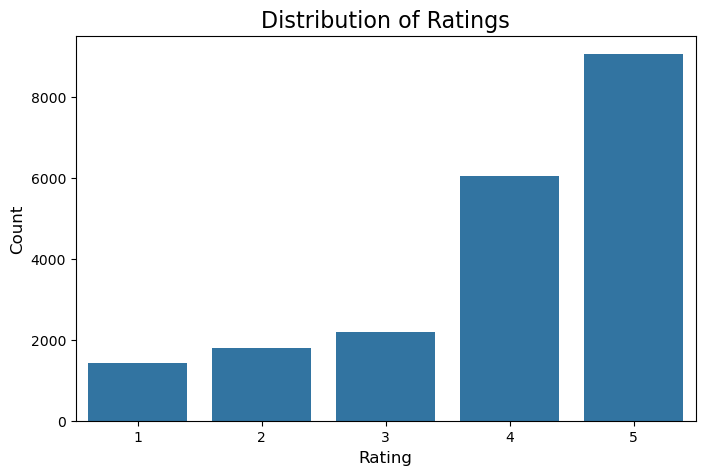

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [4]:
# Analyze and visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=Hoteldf)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Display value counts for ratings
Hoteldf['Rating'].value_counts()

In [5]:
# Map ratings to sentiments
Hoteldf['Sentiment'] = Hoteldf['Rating'].apply(
    lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive')
)

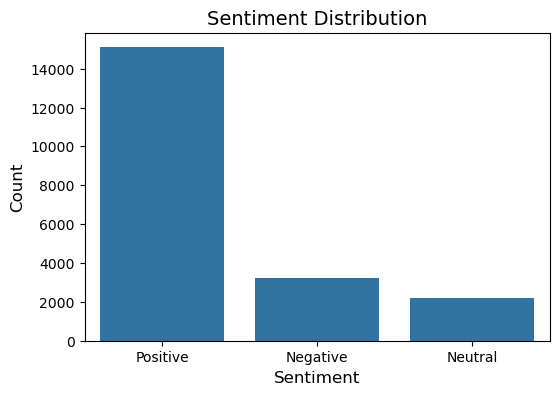

In [6]:
# EDA: Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=Hoteldf, x='Sentiment')
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

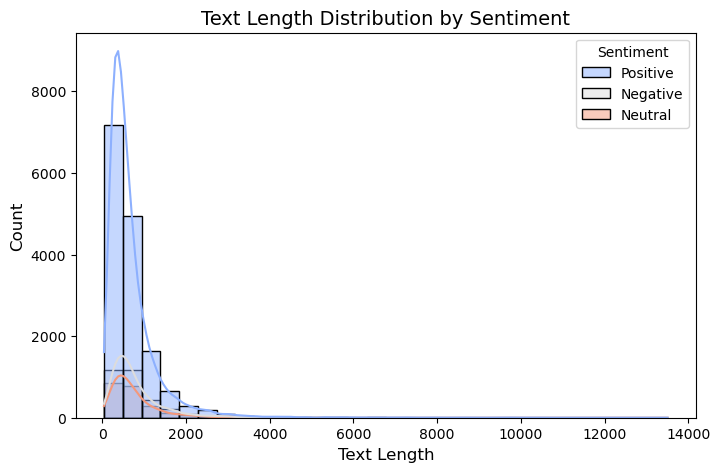

In [7]:
# EDA: Text Length Distribution
Hoteldf['Text_Length'] = Hoteldf['Review'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=Hoteldf, x='Text_Length', hue='Sentiment', bins=30, kde=True, palette='coolwarm')
plt.title("Text Length Distribution by Sentiment", fontsize=14)
plt.xlabel("Text Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

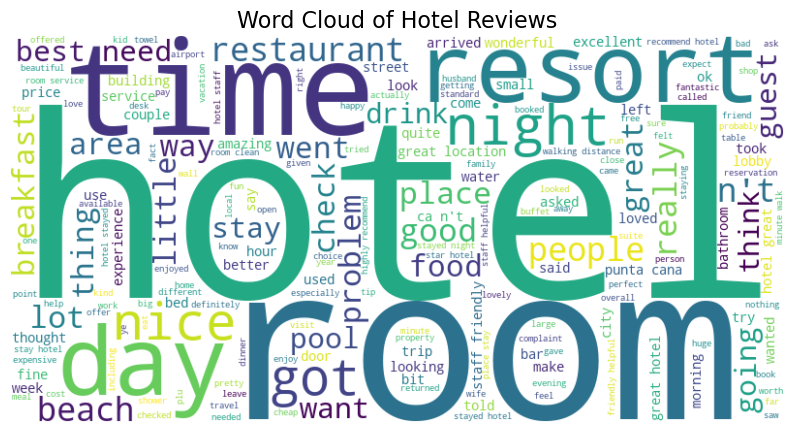

In [8]:
# Combine all review text into a single string
all_reviews = ' '.join(Hoteldf['Review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hotel Reviews', fontsize=16)
plt.show()

In [10]:
#create a function to apply our data preprocessing steps.
def preprocess_text(text):
    tokenized_documents = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_documents if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return ' '.join(stemmed_text)

In [11]:
stop_words = nltk.corpus.stopwords.words('english')

In [12]:
# Apply the preprocessing function to the Review column
Hoteldf['Review'] = Hoteldf['Review'].apply(preprocess_text)
Hoteldf.head()

,S.No.,Review,Rating,Sentiment,Text_Length
0,1,nice hotel expens park got good deal stay hote...,4,Positive,593
1,2,ok noth special charg diamond member hilton de...,2,Negative,1689
2,3,nice room 4 experi hotel monaco seattl good ho...,3,Neutral,1427
3,4,uniqu great stay wonder time hotel monaco loca...,5,Positive,600
4,5,great stay great stay went seahawk game awesom...,5,Positive,1281


In [13]:
print(Hoteldf.groupby('Sentiment').count())

           S.No.  Review  Rating  Text_Length
Sentiment                                    
Negative    3214    3214    3214         3214
Neutral     2184    2184    2184         2184
Positive   15093   15093   15093        15093


In [14]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the 'Review' column
X = vectorizer.fit_transform(Hoteldf['Review'])
# Convert to DataFrame
X = pd.DataFrame(X.toarray())
# Display the first few rows
X.head()

,0,1,2,3,4,5,6,7,8,9,...,38268,38269,38270,38271,38272,38273,38274,38275,38276,38277
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Split the dataset
from sklearn.model_selection import train_test_split

y = Hoteldf['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 99)

<Axes: xlabel='Sentiment', ylabel='count'>

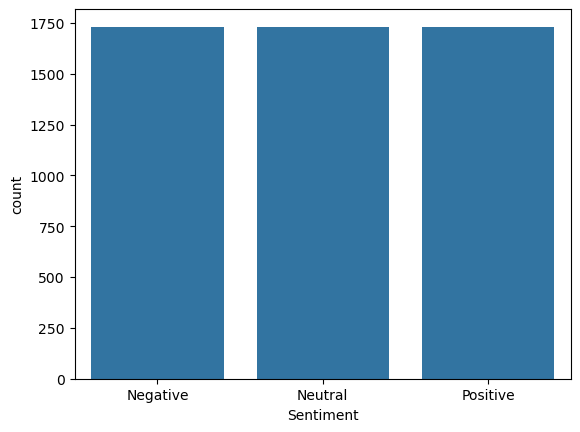

In [16]:
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)


sns.countplot(x=y_train_undersampled)


In [17]:
# Initialize Naive Bayes model
model = MultinomialNB(alpha=0.5)

# Train the model on the resampled training dataset
model.fit(X_train_undersampled, y_train_undersampled)


MultinomialNB(alpha=0.5)

In [18]:
y_pred = model.predict(X_test)

#Computing the Accuracy and Making the Confusion Matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, '\n')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

accuracy:0.77


Confusion Matrix:
[[ 529  140   13]
 [  87  287   79]
 [  66  574 2324]] 

Classification Report:

              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78       682
     Neutral       0.29      0.63      0.39       453
    Positive       0.96      0.78      0.86      2964

    accuracy                           0.77      4099
   macro avg       0.67      0.73      0.68      4099
weighted avg       0.86      0.77      0.80      4099



In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
print(sentiment.polarity_scores('hotel rex highly recommended stayed hotel rex pleasantly surprised hotel uniquely different gaudy flashy vegas-style chain hotels 	hotel represented way regarded san francisco afar intimate romantic character charm 	hotel restaurant called cafe andree revelation 	food consistently magnificent breakfast lunch dinner 	favorites grilled rib-eye steak grilled halibut crabcakes dulce leche creme brulee 	presentation flavor superb 	ambiance intimate safe 	regard hotel rex san francisco nook away maddening crowd'))
print(sentiment.polarity_scores('dreadful 	stay 	phone did not work 	air conditioner did not work 	tv remote did not work 	smoking room 	bartender exceptionally rude 	waited hour room service 	food nasty 	drunk woman passed hallway not making 	nicole desk unconcerned completely indifferent 	bright spot john concierge desk 	timely assistance great sense humor maid stay tolerable'))
print(sentiment.polarity_scores("nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized 	missed 3 separate wakeup calls 	concierge busy hard touch 	did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled 	comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay 	night got 12/1a checked voucher bottle champagne nice gesture fish waiting room 	impression room huge open space felt room big 	tv far away bed chore change channel 	ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept 	got room night no 	1st drop desk 	called maintainence came look thermostat told play settings happy digital box wo n't work 	asked wakeup 10am morning did n't happen 	called later 6pm nap wakeup forgot 	10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities 	great relax water jets going"))

{'neg': 0.037, 'neu': 0.656, 'pos': 0.307, 'compound': 0.9682}
{'neg': 0.24, 'neu': 0.622, 'pos': 0.139, 'compound': -0.7011}
{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'compound': 0.9889}


In [20]:
HotelTest = pd.read_csv('Hotel.csv', encoding='latin1')  # or try 'ISO-8859-1' or 'cp1252'
HotelTest.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

# Extract sentiment scores
HotelTest['compound'] = [sentiment.polarity_scores(review)['compound'] for review in HotelTest['Review']]
HotelTest['neg'] = [sentiment.polarity_scores(review)['neg'] for review in HotelTest['Review']]
HotelTest['neu'] = [sentiment.polarity_scores(review)['neu'] for review in HotelTest['Review']]
HotelTest['pos'] = [sentiment.polarity_scores(review)['pos'] for review in HotelTest['Review']]


In [23]:
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

HotelTest['VADER_Sentiment'] = HotelTest['compound'].apply(classify_sentiment)

In [24]:
HotelTest.head()

,S.No.,Review,Rating,compound,neg,neu,pos,VADER_Sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9747,0.072,0.643,0.285,Positive
1,2,ok nothing special charge diamond member hilto...,2,0.9787,0.110,0.701,0.189,Positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9889,0.081,0.700,0.219,Positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9912,0.060,0.555,0.385,Positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9797,0.135,0.643,0.221,Positive


In [25]:
HotelTest[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,20491.000000,20491.000000,20491.000000,20491.00000
mean,0.803434,0.071923,0.617648,0.31043
std,0.455654,0.065686,0.101769,0.12471
min,-0.997400,0.000000,0.123000,0.00000
25%,0.918400,0.025000,0.556000,0.22600
50%,0.973800,0.059000,0.625000,0.30300
75%,0.988800,0.103000,0.687000,0.38800
max,0.999900,0.646000,1.000000,0.81800


<Axes: xlabel='pos', ylabel='Count'>

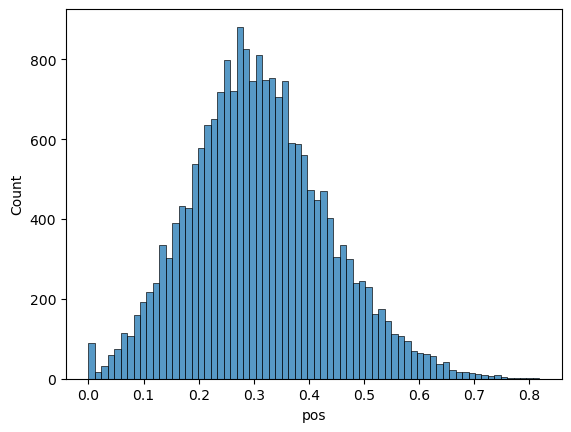

In [26]:
sns.histplot(HotelTest['pos'])

<Axes: xlabel='compound', ylabel='Count'>

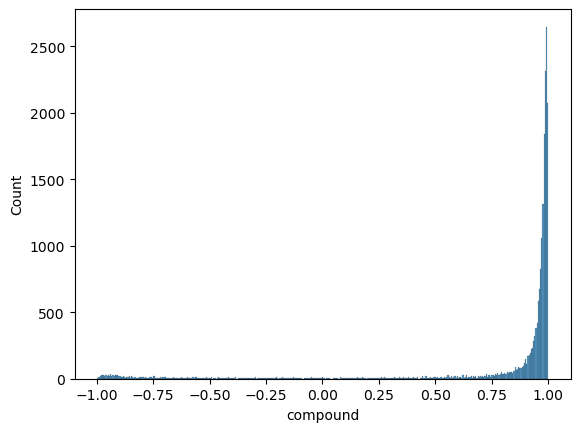

In [27]:
sns.histplot(HotelTest['compound'])

<Axes: xlabel='neg', ylabel='Count'>

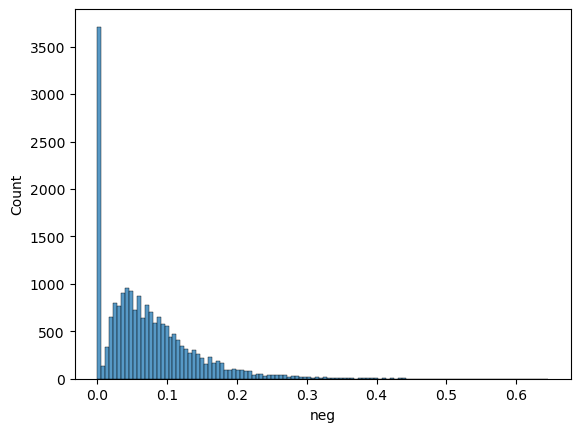

In [28]:
sns.histplot(HotelTest['neg'])

In [34]:
# New review to test
new_review = "I recently stayed at The Grand Salford Hotel and had a wonderful experience. The location is perfect, right in the heart of Salford, with easy access to public transport and local attractions. The room was spacious, clean, and well-decorated, with a comfortable bed and a stunning view of the city skyline.The staff were incredibly friendly and helpful, always ready to assist with any requests."

# Preprocess the review (if needed)
# Transform the review using the same vectorizer used during training
new_review_vectorized = vectorizer.transform([new_review])  # Vectorize as 2D input

# Predict sentiment using the trained model
predicted_sentiment = model.predict(new_review_vectorized)

print("Predicted Sentiment by Model:", predicted_sentiment[0])



Predicted Sentiment by Model: Neutral
